### 설치

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
! pip install konlpy
! git clone https://github.com/park1200656/KnuSentiLex.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 34.3 MB/s eta 0:00:00
Cloning into 'KnuSentiLex'...
remote: Enumerating objects: 45, done.
remote: Total 45 (delta 0), reused 0 (delta 0), pack-reused 45 (from 1)
Receiving objects: 100% (45/45), 380.68 KiB | 2.29 MiB/s, done.
Resolving deltas: 100% (15/15), done.


### 빈도수 분석

In [ ]:
# 1. '일자' 컬럼을 datetime 타입으로 변환
df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')

# 2. 정렬 (오름차순: 과거 → 미래)
df = df.sort_values(by='일자')

/tmp/ipython-input-16-2295481564.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['Year'] = dfm['일자'].dt.year
/tmp/ipython-input-16-2295481564.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['Month'] = dfm['일자'].dt.month


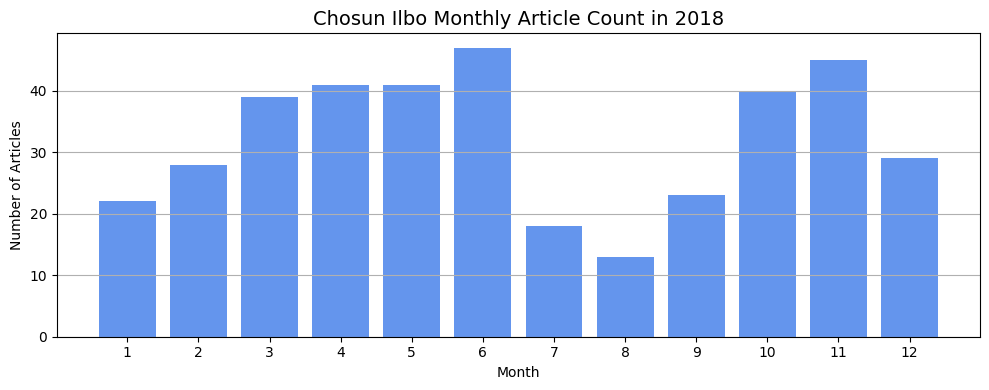

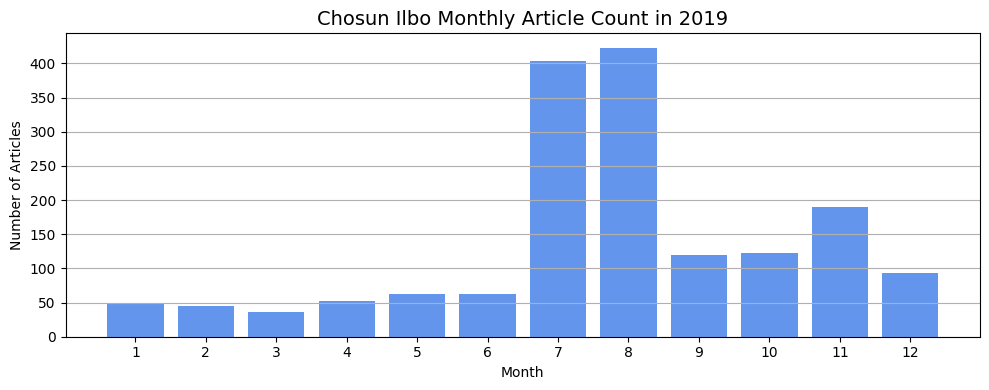

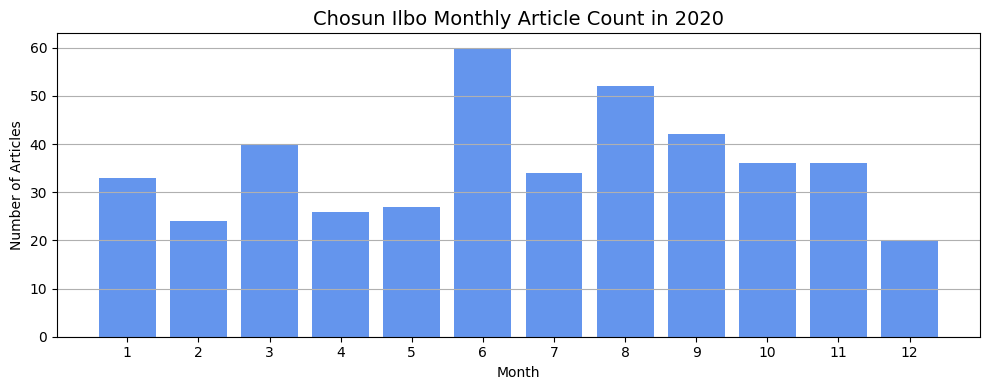

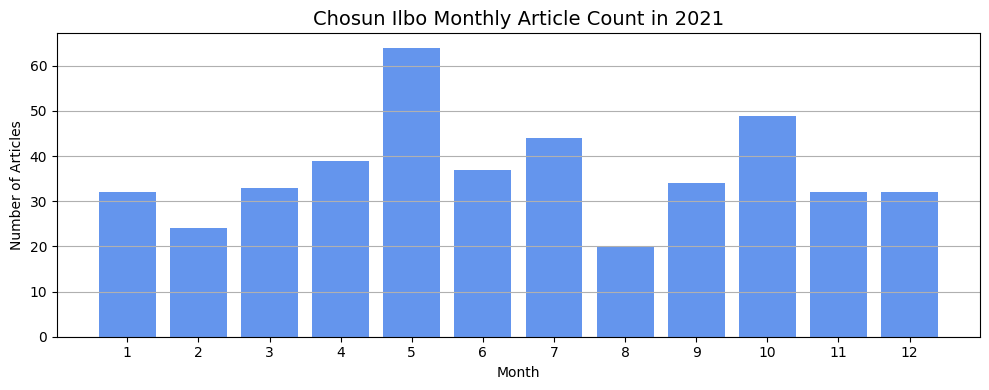

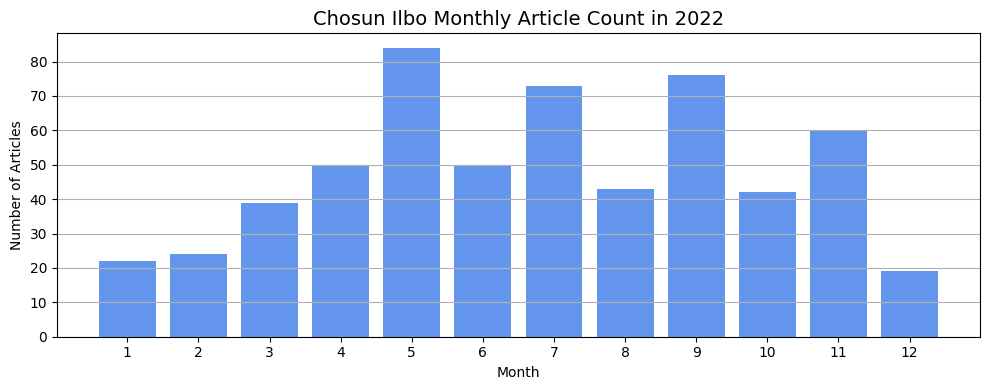

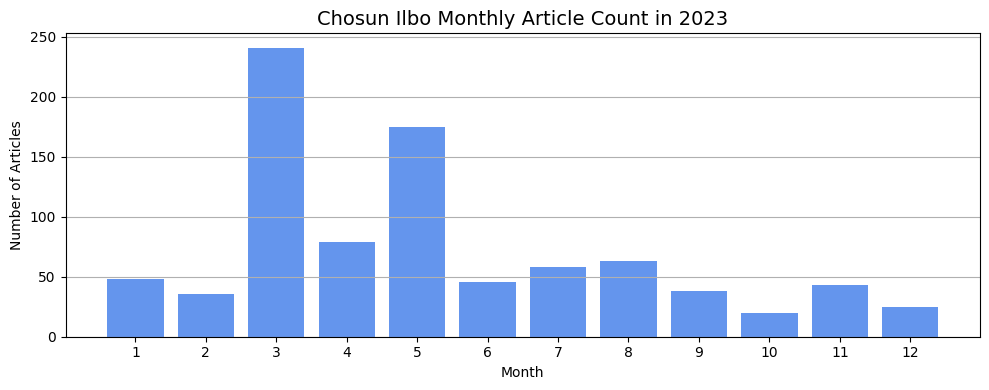

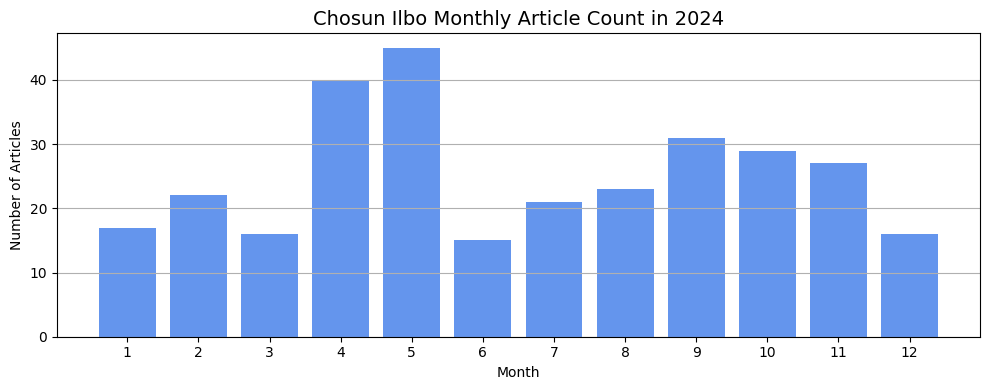

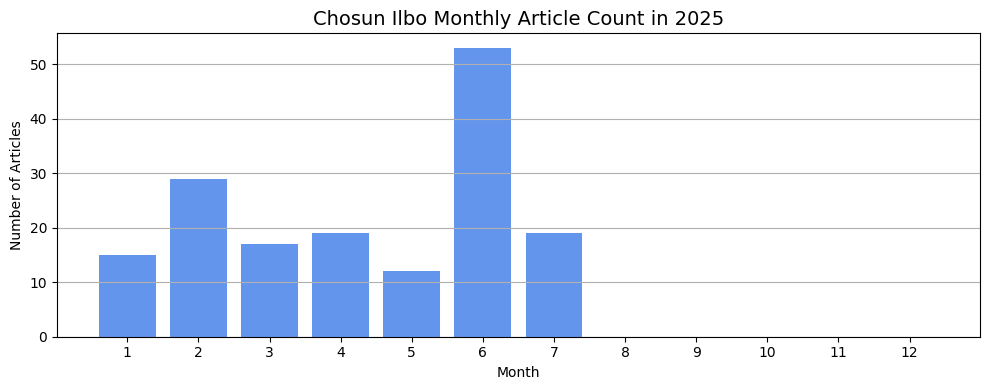

In [ ]:
# 3. Filter only for Chosun Ilbo articles
dfm = df[df['언론사'] == '동아일보']

# 4. Create 'Year' and 'Month' columns
dfm['Year'] = dfm['일자'].dt.year
dfm['Month'] = dfm['일자'].dt.month

# 5. Filter date range (2018–2025)
dfm = dfm[(dfm['Year'] >= 2018) & (dfm['Year'] <= 2025)]

# 6. Count number of articles per month for each year
monthly_counts_by_year = dfm.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# 7. Plot monthly article count for each year
for year in monthly_counts_by_year.index:
    plt.figure(figsize=(10, 4))
    plt.bar(monthly_counts_by_year.columns, monthly_counts_by_year.loc[year], color='cornflowerblue')
    plt.xticks(range(1, 13))
    plt.title(f'Chosun Ilbo Monthly Article Count in {year}', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Number of Articles')
    plt.grid(axis='y')
    plt.tight_layout()
     # 이미지 저장
    filename = f'chosun_monthly_article_count_{year}.png'
    plt.savefig(filename, dpi=300)  # 고해상도 저장 (300 dpi)
    plt.show()